# Complex model 1

This code illustrates how to create a complex model and computing its potential fields.

### Things we have to import

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

In [2]:
import pickle

In [3]:
import numpy as np
from gravmag import data_structures
from gravmag.models import rectangular_prism as rp
from gravmag import plot_functions as plf

In [4]:
import time

### Set the model area and number of prisms along the horizontal directions

In [5]:
# number of prisms forming the model along the x and y directions
model_shape = (40, 50)

# minimum x, maximum x, minimum y and maximum y
model_area = [-5100, 4900, -3800, 6200]

In [6]:
model_dx, model_dy = data_structures.grid_xy_spacing(area=model_area, shape=model_shape)
print('model dx = {:.3f} m | model dx = {:.3f} m'.format(model_dx, model_dy))

model dx = 256.410 m | model dx = 204.082 m


### Define/Load the thickness of all rectangular cells covering the simulated area

### Pick/Load points forming the horizontal model boundary

In [7]:
# Run this cell to create and save the model.
# Set this cel as 'Raw' if you want load a predefined model.

boundary_points = pickle.load(open('models/complex_model_1/boundary_points.pickle', 'rb'))

### Filter/Load the cells inside the boundary

In [8]:
# Run this cell to create and save the model.
# Set this cel as 'Raw' if you want load a predefined model.

model = pickle.load(open('models/complex_model_1/model.pickle', 'rb'))

In [9]:
# Run this cell to create and save the model.
# Set this cel as 'Raw' if you want load a predefined model.

density = pickle.load(open('models/complex_model_1/density.pickle', 'rb'))

### Plot and/or save the model

In [10]:
model_mesh = plf.prisms_to_pyvista(model, density)

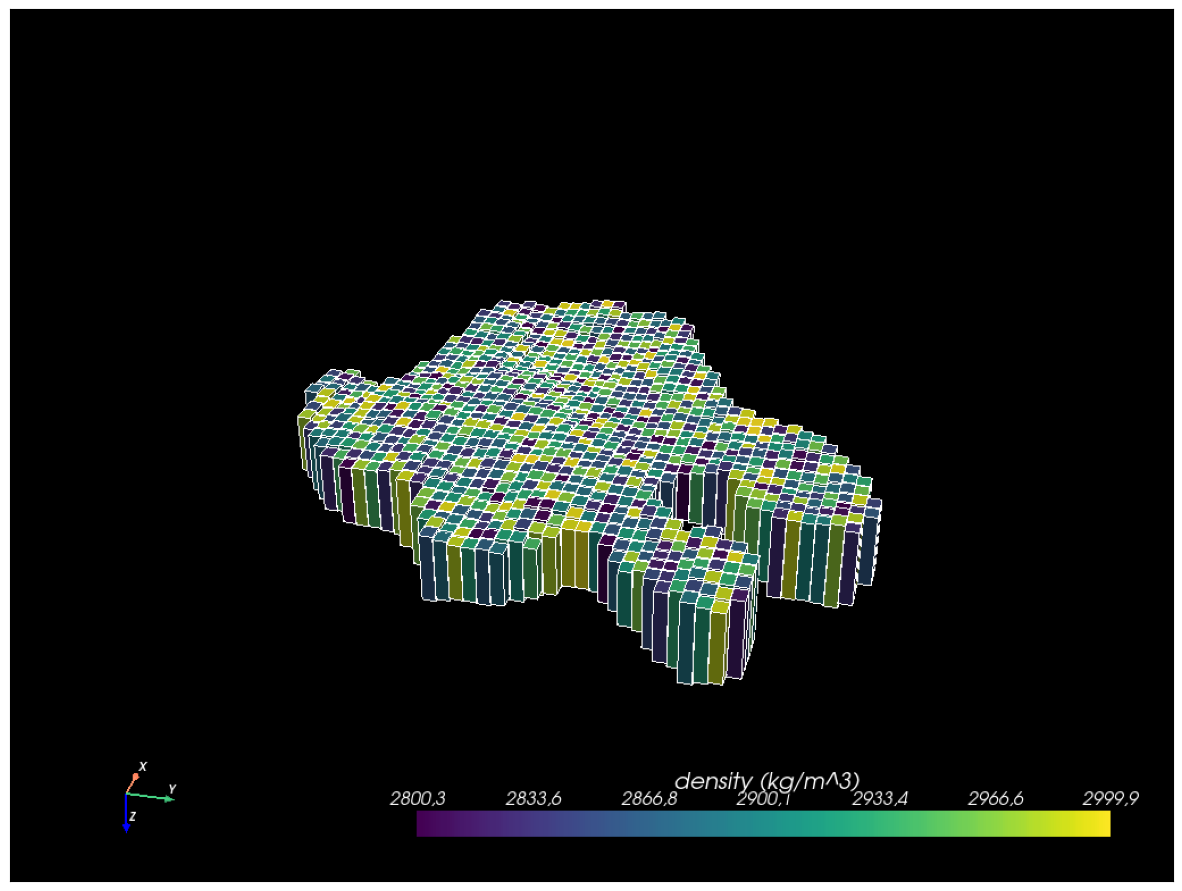

In [12]:
# read image generated with PyVista
image = Image.open('models/complex_model_1/complex_model_1.png')

# plot image generated with PyVista
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.xticks([]) # remove x ticks
plt.yticks([]) # remove y ticks
plt.show()

### Points were we compute the synthetic data

In [13]:
# number of points along x and y
shape = (300, 330)
print('n. data = {}'.format(shape[0]*shape[1]))

# minimum x, maximum x, minimum y and maximum y
area = [-5100, 4900, -3800, 6200]

# grid spacing
dx, dy = data_structures.grid_xy_spacing(area=area, shape=shape)
print('dx = {:.3f} m | dx = {:.3f} m'.format(dx, dy))

n. data = 99000
dx = 33.445 m | dx = 30.395 m


In [14]:
# grid of computation points
coordinates_grid = data_structures.grid_xy(area=area, shape=shape, z0=-150)

In [15]:
print('num. data points = {}'.format(coordinates_grid['shape'][0]*coordinates_grid['shape'][1]))

num. data points = 99000


In [16]:
# coordinates rearranged for plotting
# they are "views' of the original coordinates in 'coordinates_grid'
X, Y = data_structures.grid_xy_to_full_matrices_view(
    x = coordinates_grid['x'],
    y = coordinates_grid['y'],
    shape = coordinates_grid['shape']
)

### Synthetic gravity tensor components

In [17]:
components = ['xx', 'xy', 'xz', 'yy', 'yz', 'zz']

In [18]:
# Run this cell may take some time.

start = time.time()

# Compute the synthetic gravity-gradient data without noise
simulated_data = dict()

for component in components:
    simulated_data[component] = rp.grav(
        coordinates = data_structures.grid_xy_to_full_flatten(grid=coordinates_grid, ordering='xy'), 
        prisms=model, density=density, field=component
    )

end = time.time()

print('elapsed time = {} s'.format(end - start))

elapsed time = 116.15763640403748 s


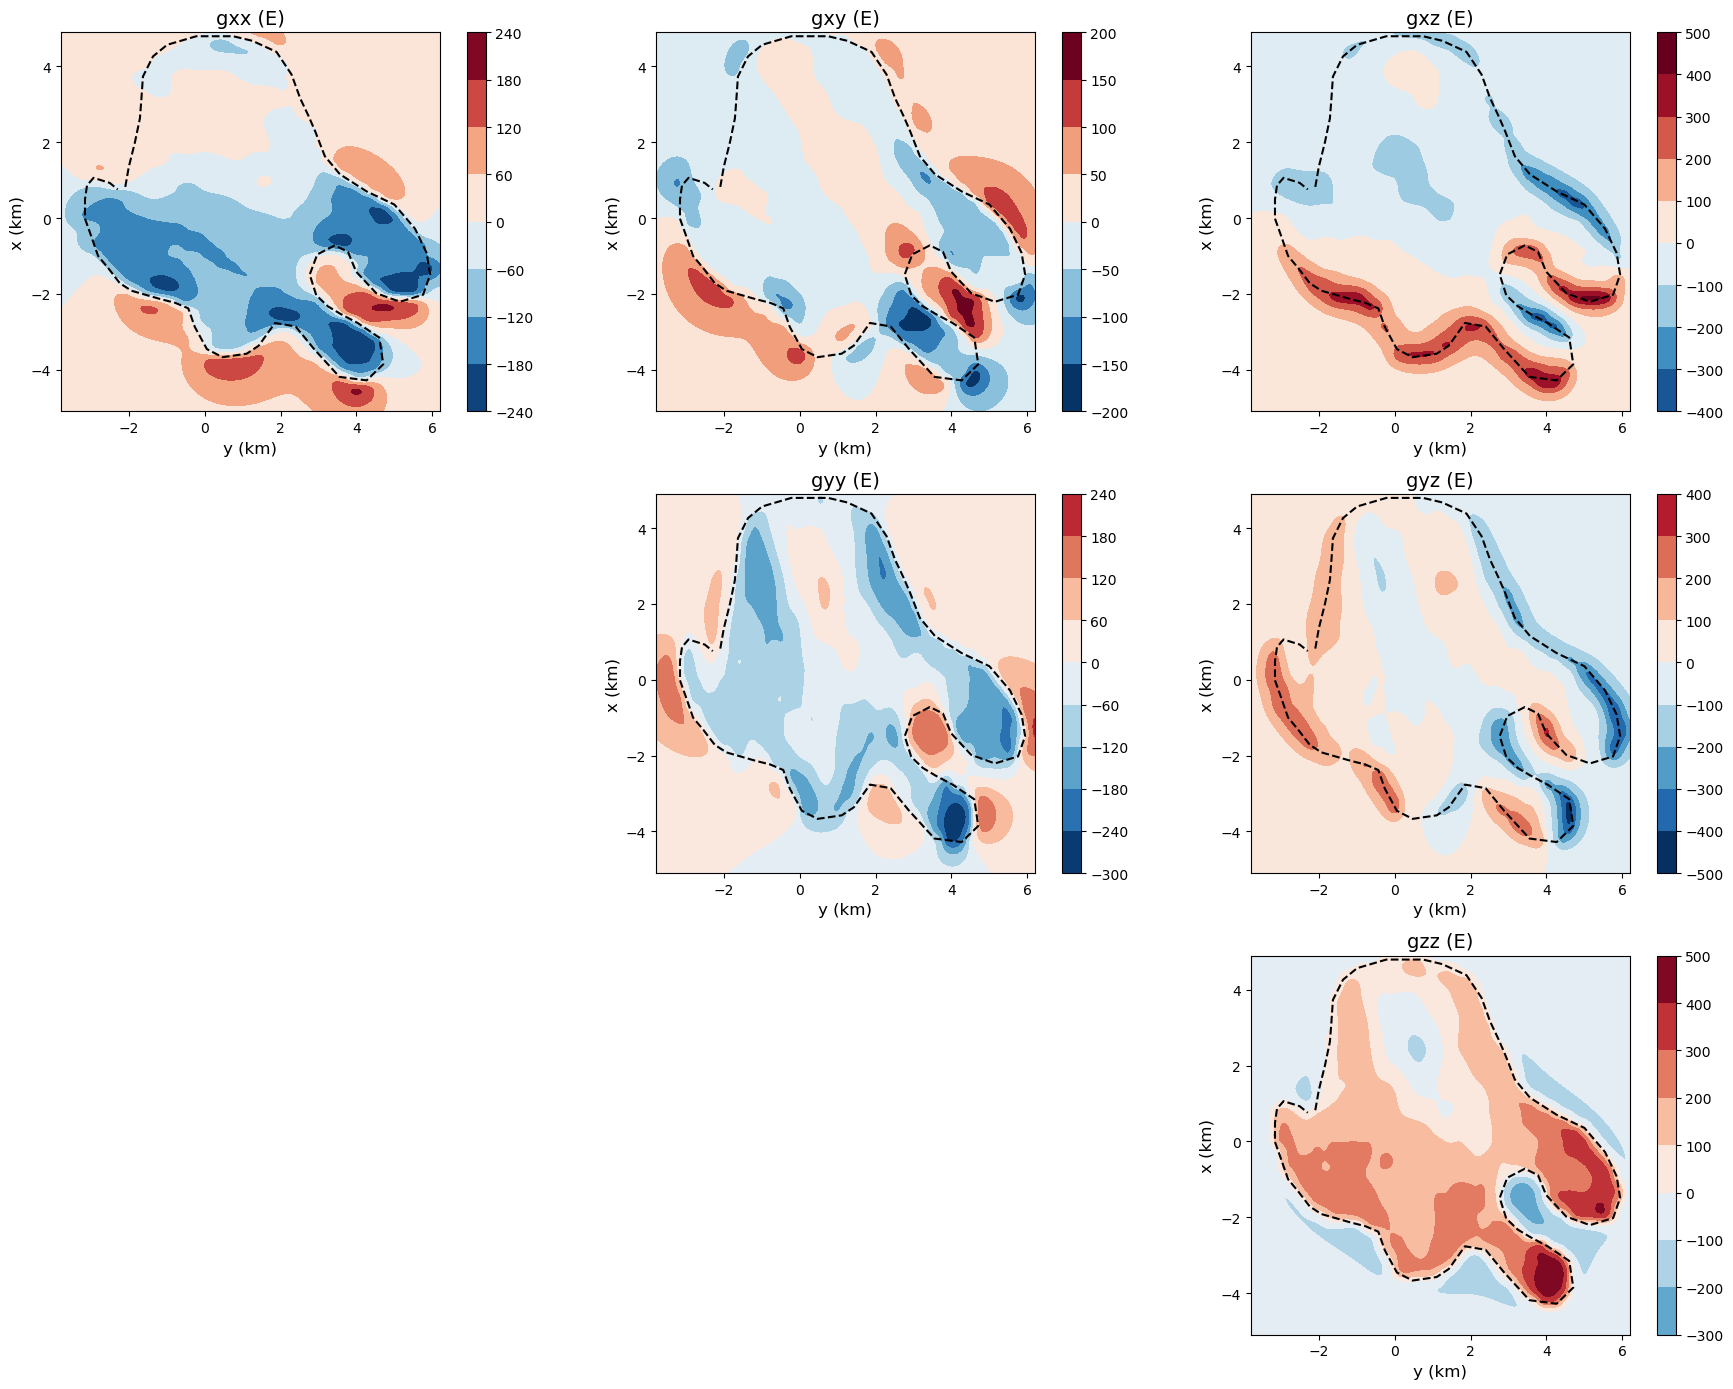

In [19]:
windows = [1, 2, 3, 5, 6, 9]
titles = ['gxx (E)', 'gxy (E)', 'gxz (E)', 'gyy (E)', 'gyz (E)', 'gzz (E)']

plt.figure(figsize=(18,14))

for component, window, title in zip(components, windows, titles):
    bounds = np.max(np.abs(simulated_data[component]))
    plt.subplot(3,3,window)
    plt.title(title, fontsize=14)
    plt.axis('scaled')
    plt.contourf(Y*0.001, X*0.001, 
                 data_structures.grid_xy_full_flatten_to_matrix(
                     data=simulated_data[component], ordering='xy', shape=coordinates_grid['shape']
                 ), 
                 cmap='RdBu_r', vmin=-bounds, vmax=bounds)
    plt.colorbar()
    plt.plot(boundary_points[:,1]*1e-3, boundary_points[:,0]*1e-3, '--k')
    plt.ylim(0.001*coordinates_grid['area'][0], 0.001*coordinates_grid['area'][1])
    plt.xlim(0.001*coordinates_grid['area'][2], 0.001*coordinates_grid['area'][3])
    plt.ylabel('x (km)', fontsize=12)
    plt.xlabel('y (km)', fontsize=12)

plt.tight_layout()

plt.show()